# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib notebook


In [46]:
bh_df = pd.read_csv('train.csv', index_col='ID')
print(bh_df.info(), bh_df.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB
None Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


In [48]:
bh_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [49]:
bh_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [50]:
dis_over5 = bh_df.loc[bh_df['dis'] >= 5, bh_df.columns != 'ID']
dis_under5 = bh_df.loc[bh_df['dis'] < 5, bh_df.columns != 'ID']

age_75over = bh_df.loc[bh_df['age'] >= 76.7, bh_df.columns != 'ID']
age_under75 = bh_df.loc[bh_df['age'] < 76.7, bh_df.columns != 'ID']

medv_25over = bh_df.loc[bh_df['medv'] >= 25, bh_df.columns != 'ID']
medv_under25 = bh_df.loc[bh_df['medv'] < 25, bh_df.columns != 'ID']

I chose to look at splits between distance to employment center, house age, and median value. 5 miles is about as far as a person might want to walk and is around the 75 percentile, while the max is double that at ~10 miles, so I think the data will look different on either side of that mark. House age seems to split in the 60s and 70s range with a mean at ~68 and median at ~76 so I'm curious to see what's happening above that mark and below. I'm also curious about house value where the 75 percentile is at 25,000 but the max is twice that.

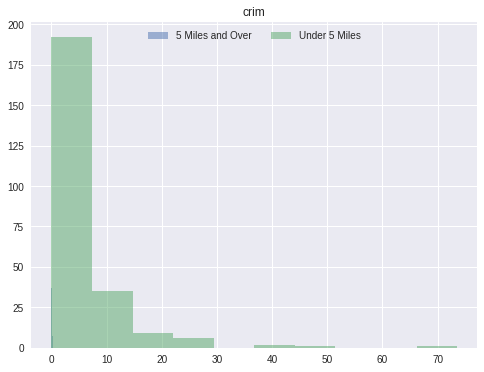

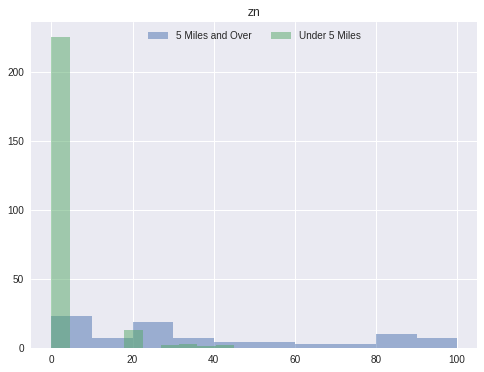

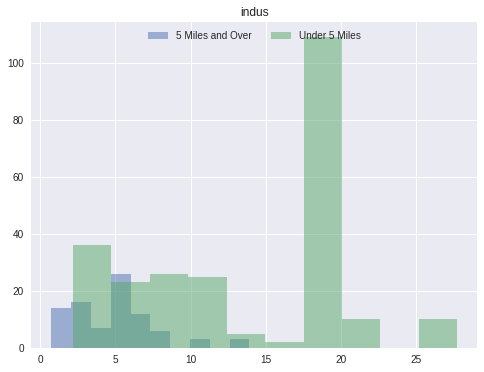

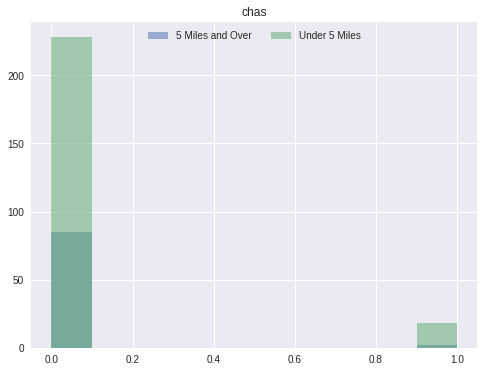

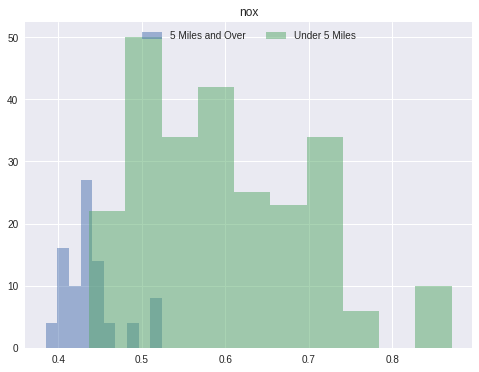

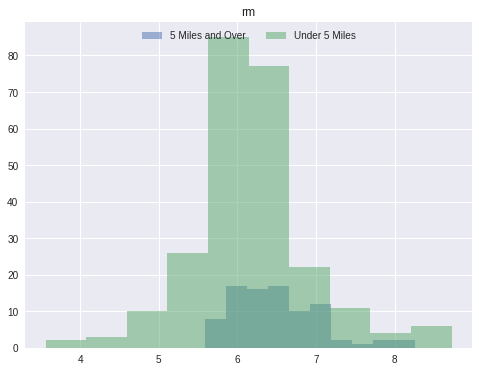

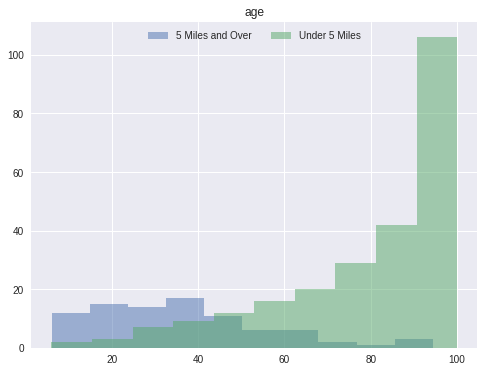

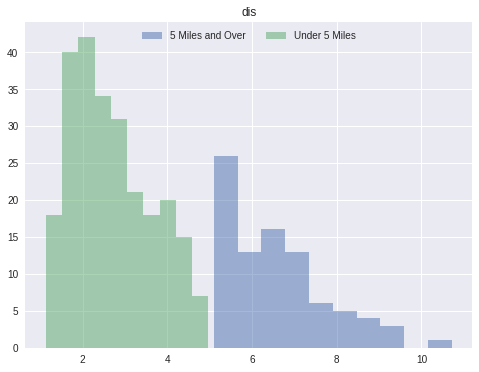

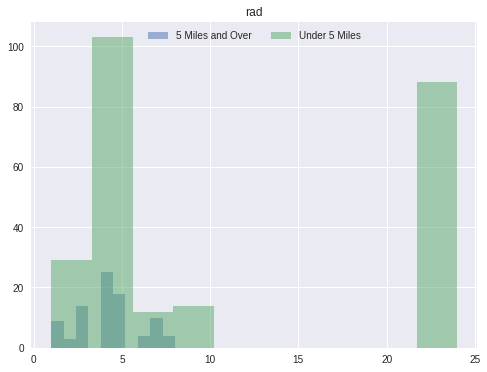

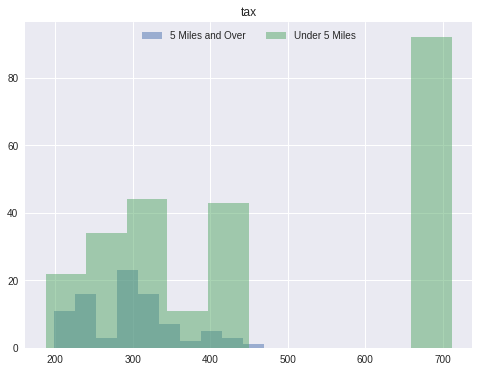

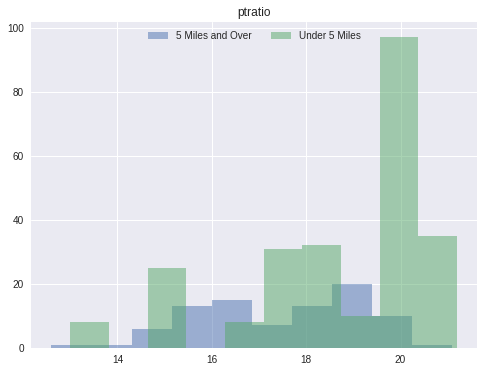

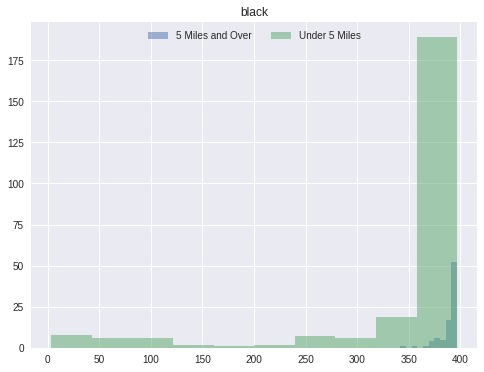

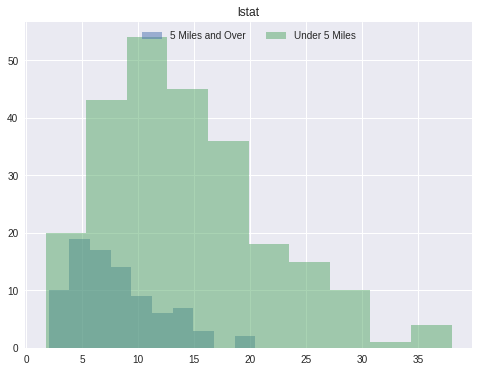

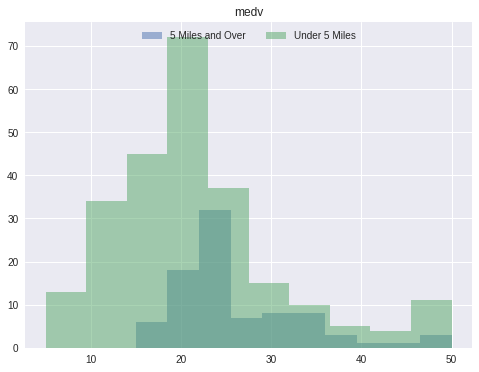

In [92]:
for col in bh_df.columns:
    dis_over5[col].hist(figsize=[8, 6], alpha=0.5)
    dis_under5[col].hist(figsize=[8, 6], alpha=0.5)
    plt.title(col)
    plt.legend(["5 Miles and Over", "Under 5 Miles"], loc='upper center', ncol=2)
    plt.show()

# medv_25over_l = medv_25over.medv.values.tolist()
# medv_under25_1 = medv_under25.medv.values.tolist()

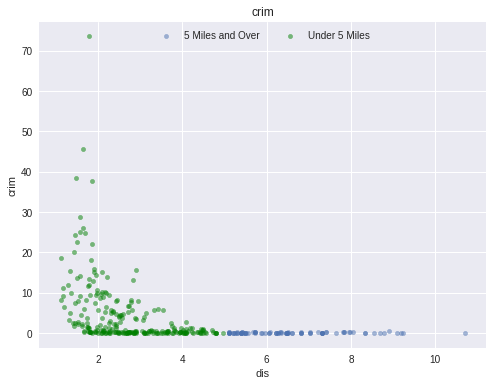

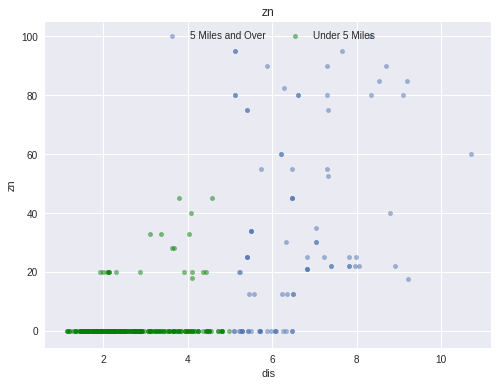

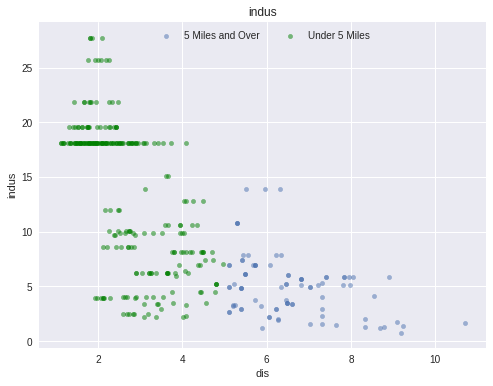

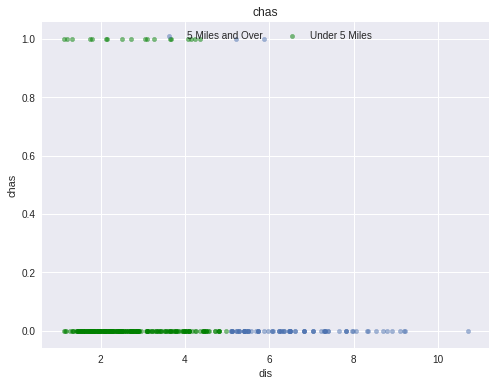

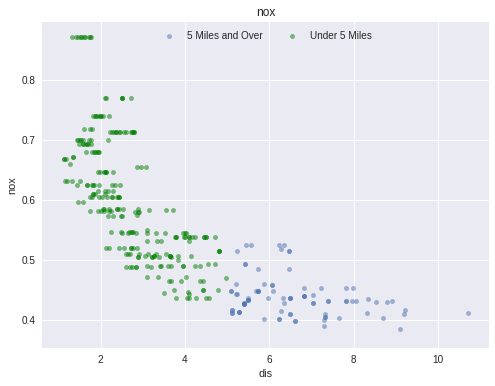

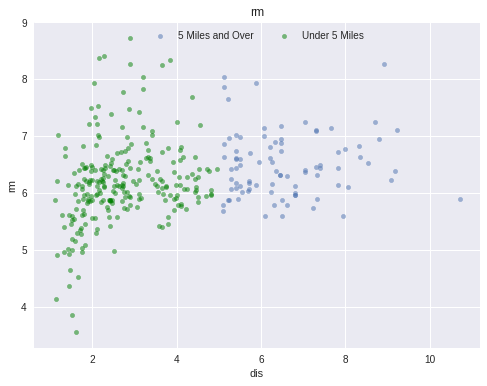

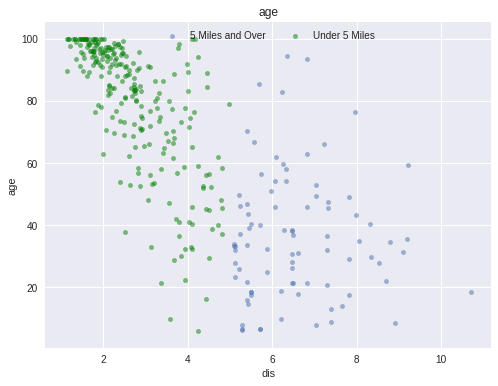

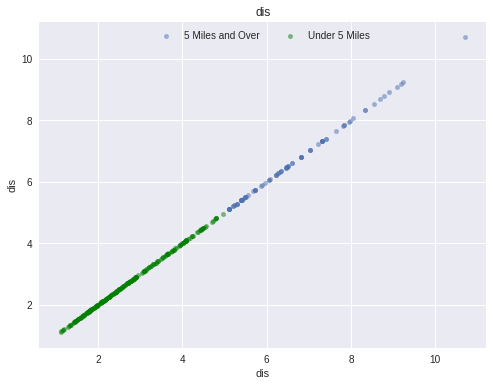

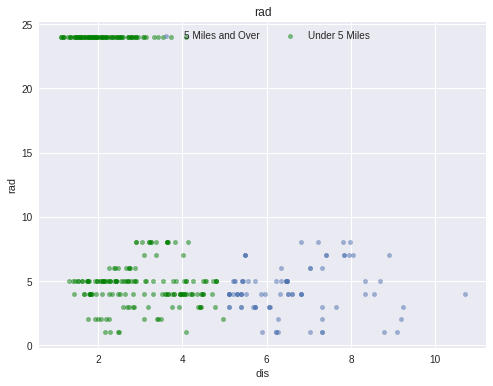

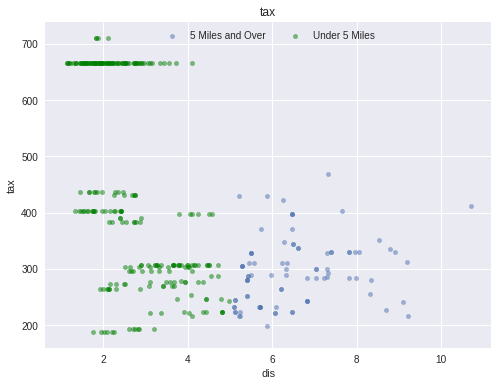

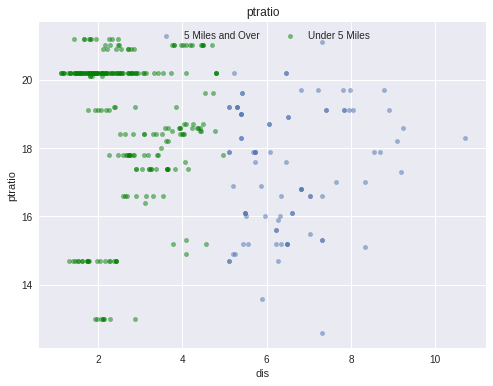

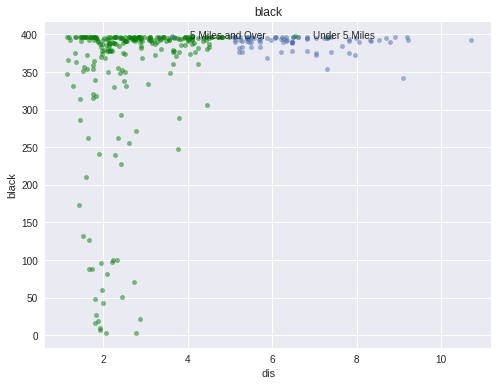

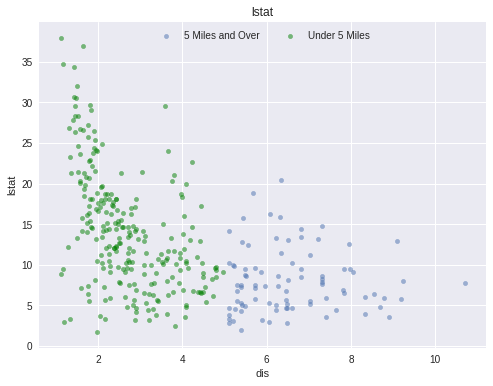

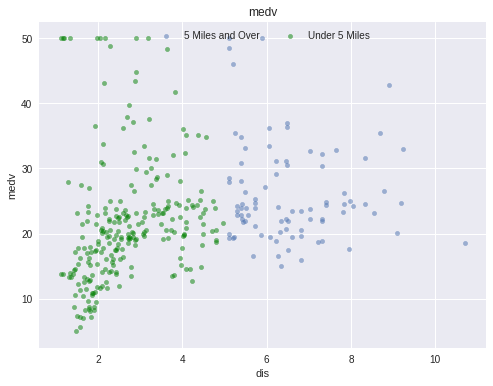

In [90]:
for col in bh_df.columns:
    ax = dis_over5.plot.scatter('dis', col, figsize=[8, 6], alpha=0.5)
    ax1 = dis_under5.plot.scatter('dis', col, figsize=[8, 6], alpha=0.5, color='g', ax=ax)
    plt.title(col)
    plt.legend(["5 Miles and Over", "Under 5 Miles"], loc='upper center', ncol=2)
    plt.show()

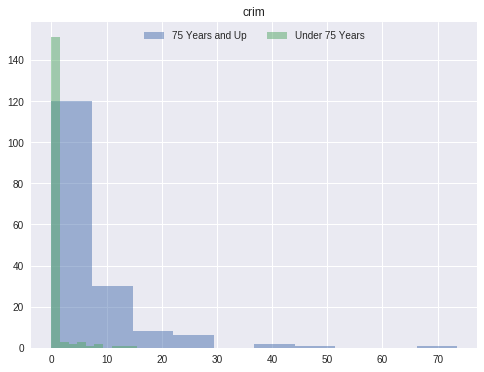

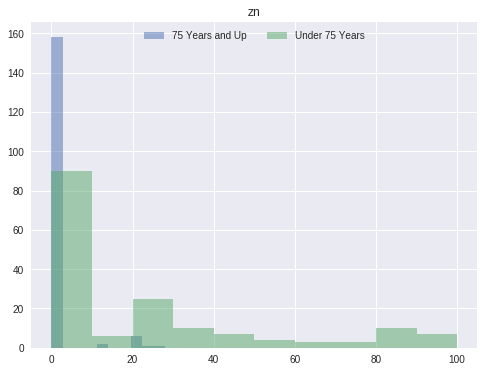

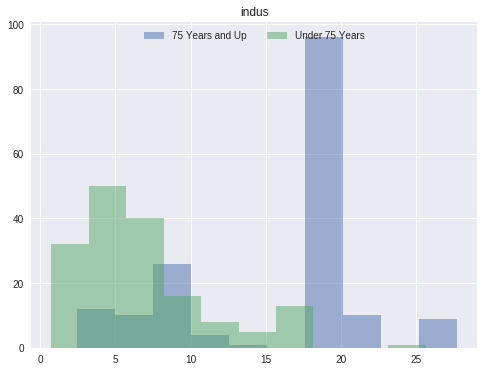

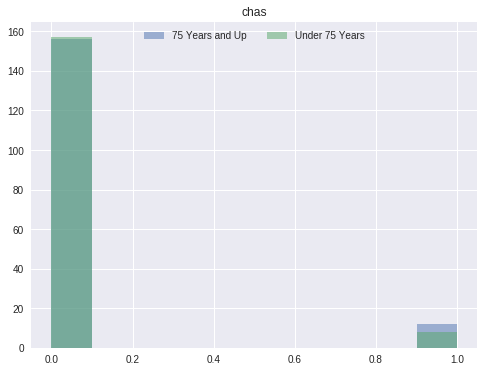

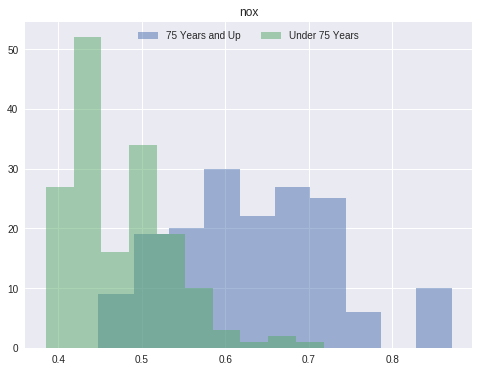

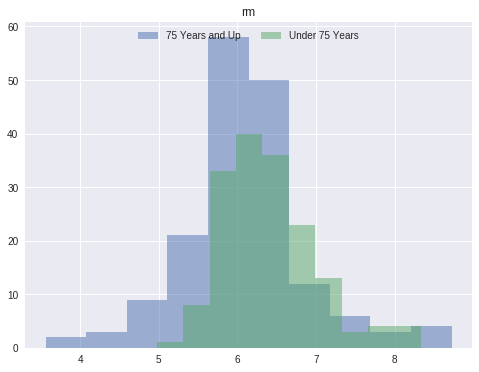

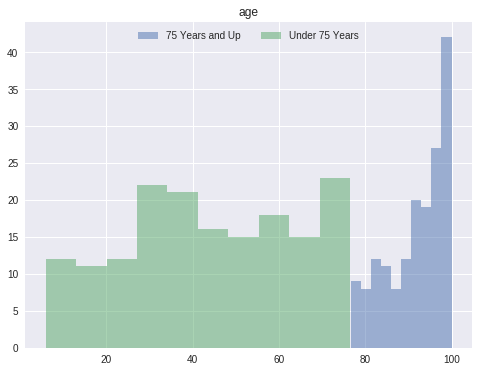

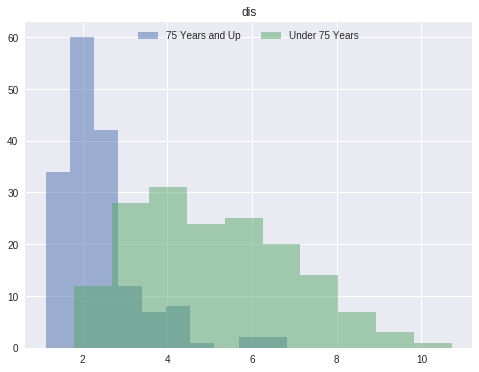

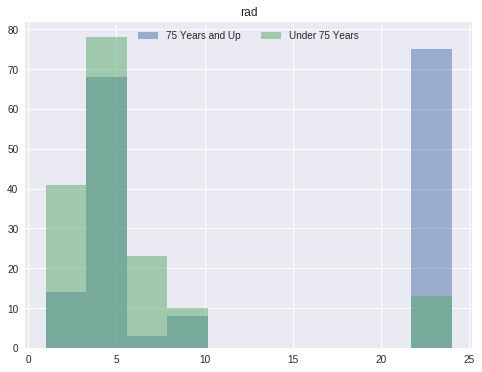

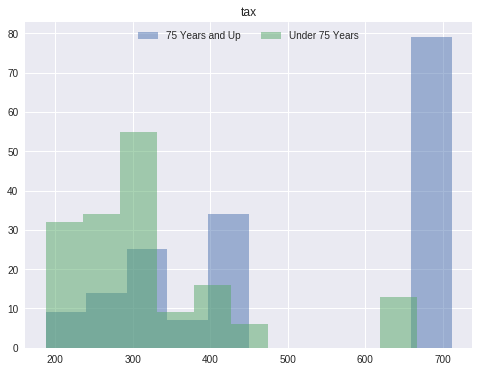

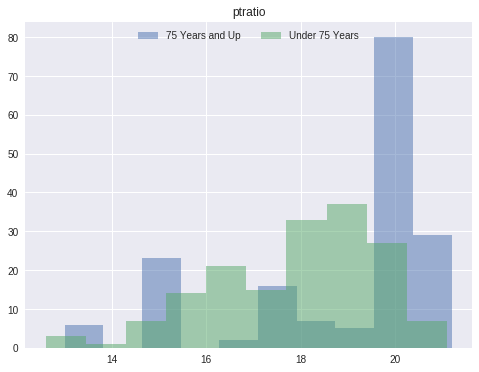

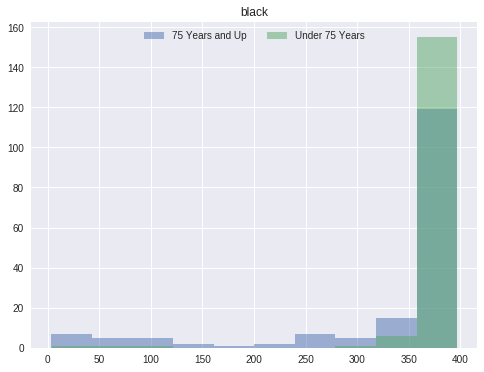

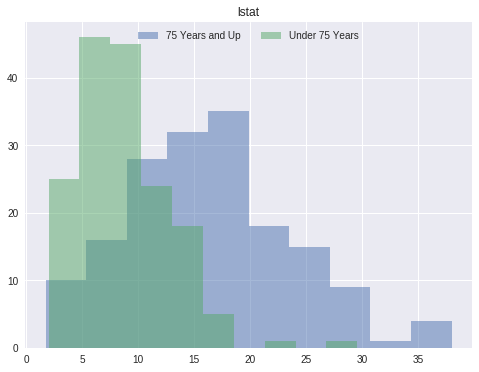

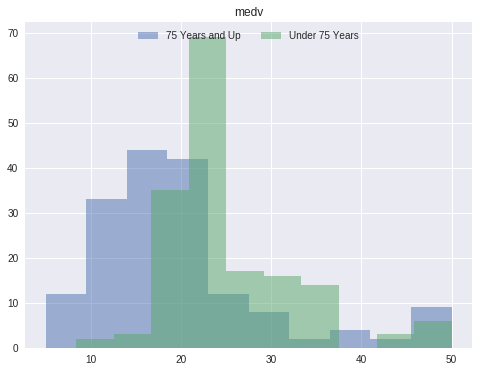

In [93]:
for col in bh_df.columns:
    age_75over[col].hist(figsize=[8, 6], alpha=0.5)
    age_under75[col].hist(figsize=[8, 6], alpha=0.5)
    plt.title(col)
    plt.legend(["75 Years and Up", "Under 75 Years"], loc='upper center', ncol=2)
    plt.show()


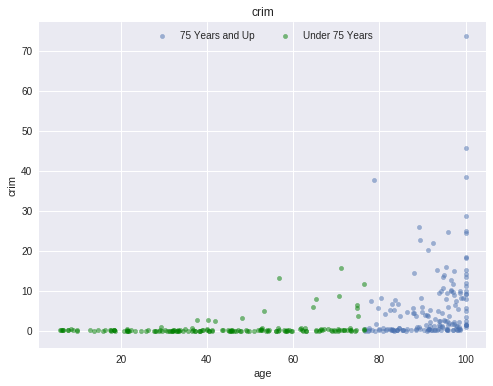

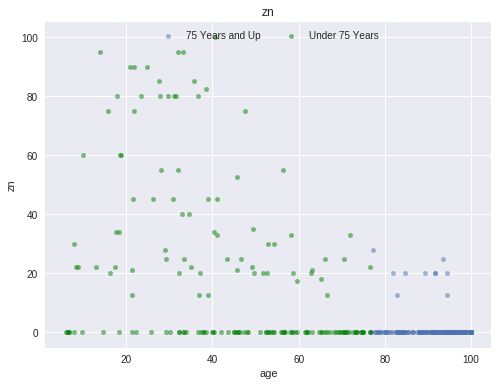

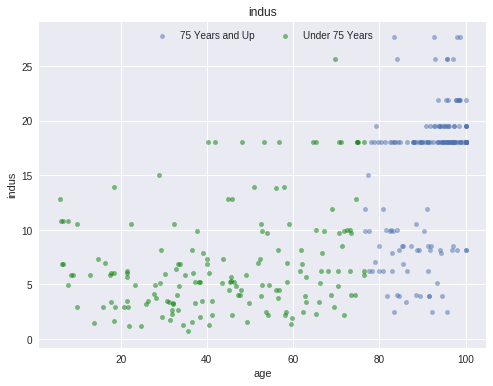

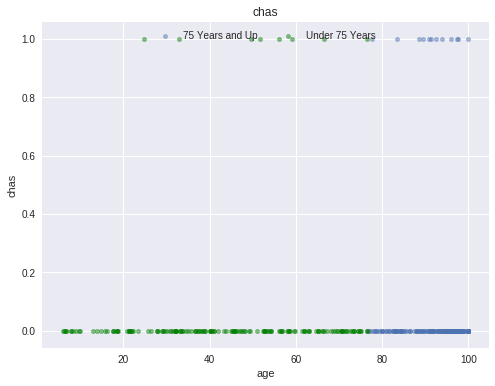

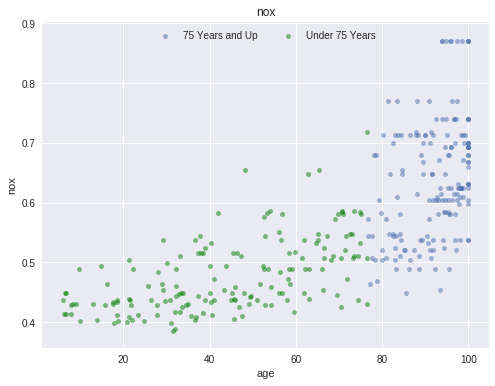

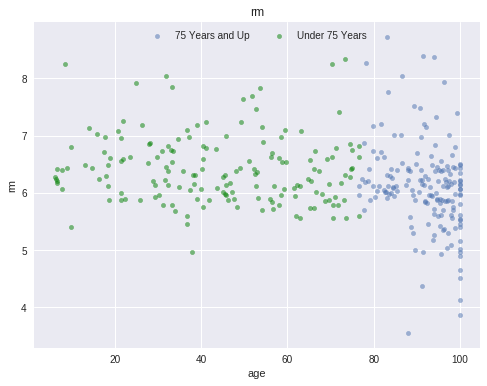

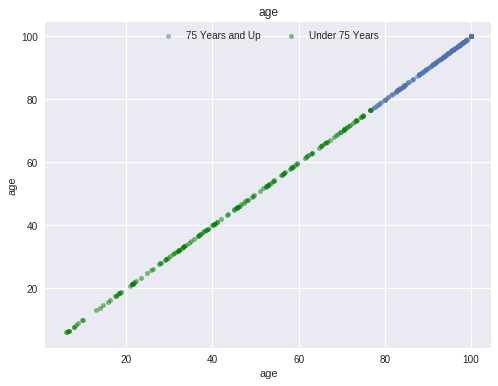

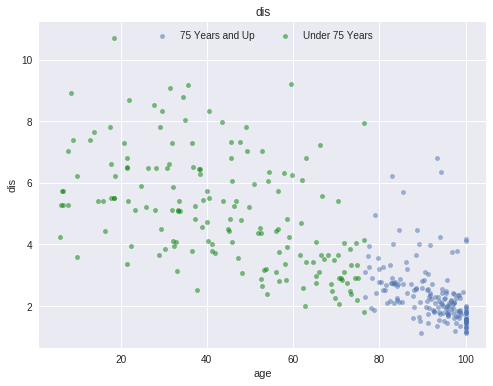

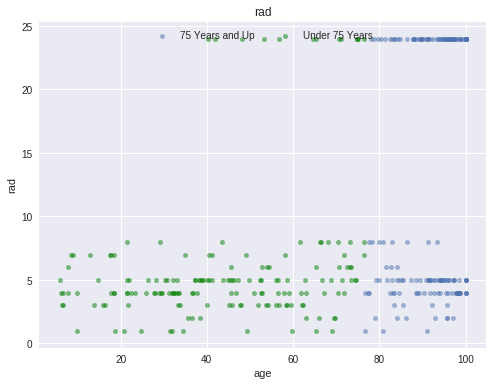

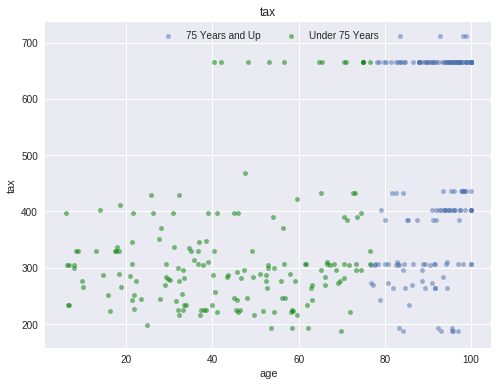

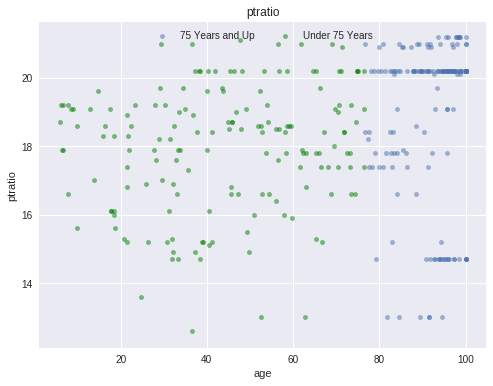

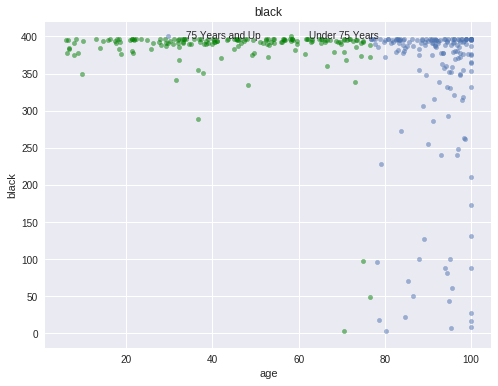

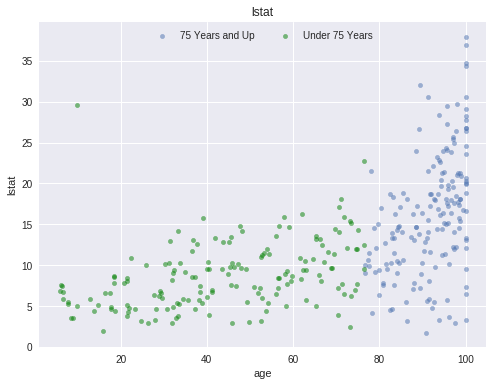

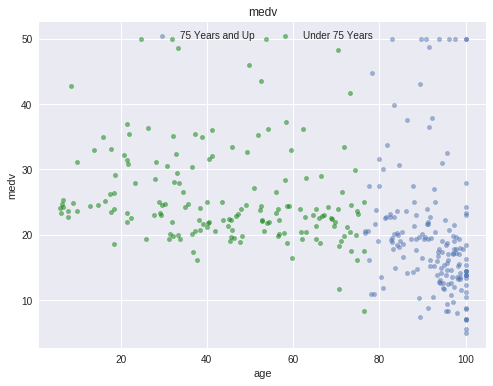

In [94]:
for col in bh_df.columns:
    ax = age_75over.plot.scatter('age', col, figsize=[8, 6], alpha=0.5)
    ax1 = age_under75.plot.scatter('age', col, figsize=[8, 6], alpha=0.5, color='g', ax=ax)
    plt.title(col)
    plt.legend(["75 Years and Up", "Under 75 Years"], loc='upper center', ncol=2)
    plt.show()

In [ ]:
for col in bh_df.columns:
    medv_25over[col].hist(figsize=[8, 6], alpha=0.5)
    medv_under25[col].hist(figsize=[8, 6], alpha=0.5)
    plt.title(col)
    plt.legend(["Medv 25K and Over", "Under 5 Miles"], loc='upper center', ncol=2)
    plt.show()

# medv_25over_l = medv_25over.medv.values.tolist()
# medv_under25_1 = medv_under25.medv.values.tolist()

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!